# Data Analysis with Decision Tree (sklearn)

Research Decision Tree algorithm to be used as a data analysis tool.

### References:

- [Kaggle: Decision-Tree Classifier Tutorial ](https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial)
- [StackOverFlor: sklearn min_impurity_decrease explanation](https://stackoverflow.com/questions/54812230/sklearn-min-impurity-decrease-explanation)

In [1]:
!pip install graphviz
!pip install -U seaborn

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

## load data

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
data = pd.DataFrame(X, columns=iris.feature_names)
data['species'] = iris.target
#data['species'] = data['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
data.shape

(150, 5)

## Decision Tree

In [4]:
# get data
X = data.drop(['species'], axis=1)
y = data['species']
X.shape, y.shape

((150, 4), (150,))

In [73]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model
clf = DecisionTreeClassifier(criterion='gini', 
                             max_depth=None,
                             #min_impurity_decrease = 0.01, 
                             random_state=0)
# fit the model
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

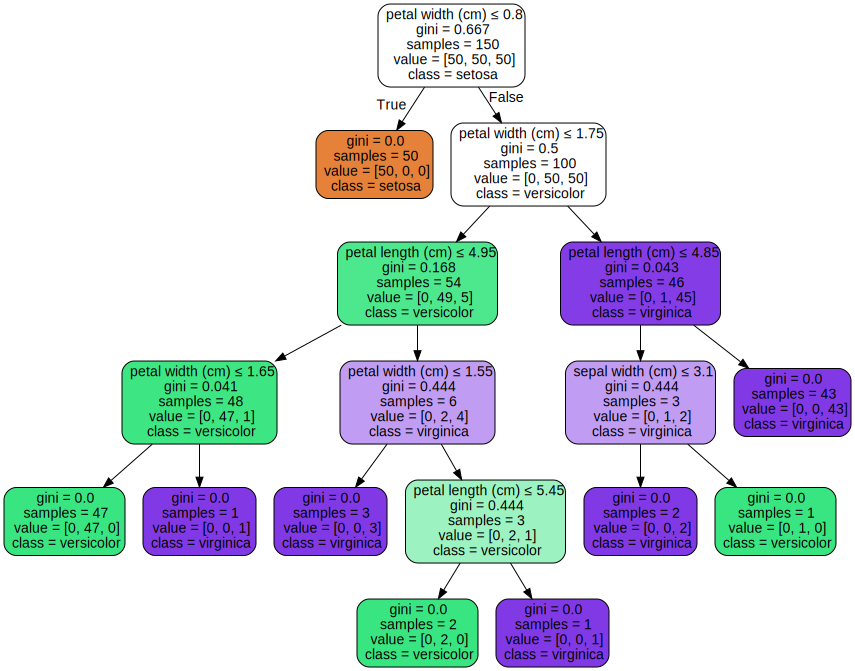

In [74]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                              feature_names=[c for c in data.columns if c != 'species'],  
                              class_names=['setosa', 'versicolor', 'virginica'],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

In [77]:
def get_lineage(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    impurity = tree.tree_.impurity

    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     

    def recurse(left, right, child, lineage=None):          
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'

        lineage.append((parent, split, threshold[parent], features[parent], impurity[parent]))

        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)

    for child in idx:
        for node in recurse(left, right, child):
            print(node)


In [78]:
get_lineage(clf, [c for c in data.columns if c != 'species'])

(0, 'l', 0.800000011920929, 'petal width (cm)', 0.6666666666666667)
1
(0, 'r', 0.800000011920929, 'petal width (cm)', 0.6666666666666667)
(2, 'l', 1.75, 'petal width (cm)', 0.5)
(3, 'l', 4.950000047683716, 'petal length (cm)', 0.16803840877914955)
(4, 'l', 1.6500000357627869, 'petal width (cm)', 0.04079861111111116)
5
(0, 'r', 0.800000011920929, 'petal width (cm)', 0.6666666666666667)
(2, 'l', 1.75, 'petal width (cm)', 0.5)
(3, 'l', 4.950000047683716, 'petal length (cm)', 0.16803840877914955)
(4, 'r', 1.6500000357627869, 'petal width (cm)', 0.04079861111111116)
6
(0, 'r', 0.800000011920929, 'petal width (cm)', 0.6666666666666667)
(2, 'l', 1.75, 'petal width (cm)', 0.5)
(3, 'r', 4.950000047683716, 'petal length (cm)', 0.16803840877914955)
(7, 'l', 1.550000011920929, 'petal width (cm)', 0.4444444444444444)
8
(0, 'r', 0.800000011920929, 'petal width (cm)', 0.6666666666666667)
(2, 'l', 1.75, 'petal width (cm)', 0.5)
(3, 'r', 4.950000047683716, 'petal length (cm)', 0.16803840877914955)
(7, 

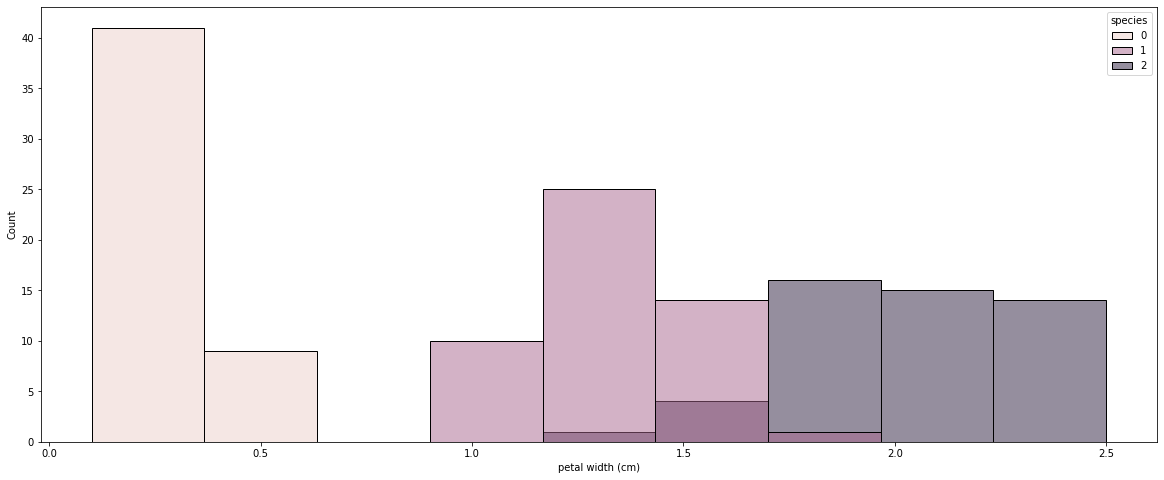

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots( figsize = (20, 8))
sns.histplot(data=data, x="petal width (cm)", hue="species", ax = ax)
plt.show()

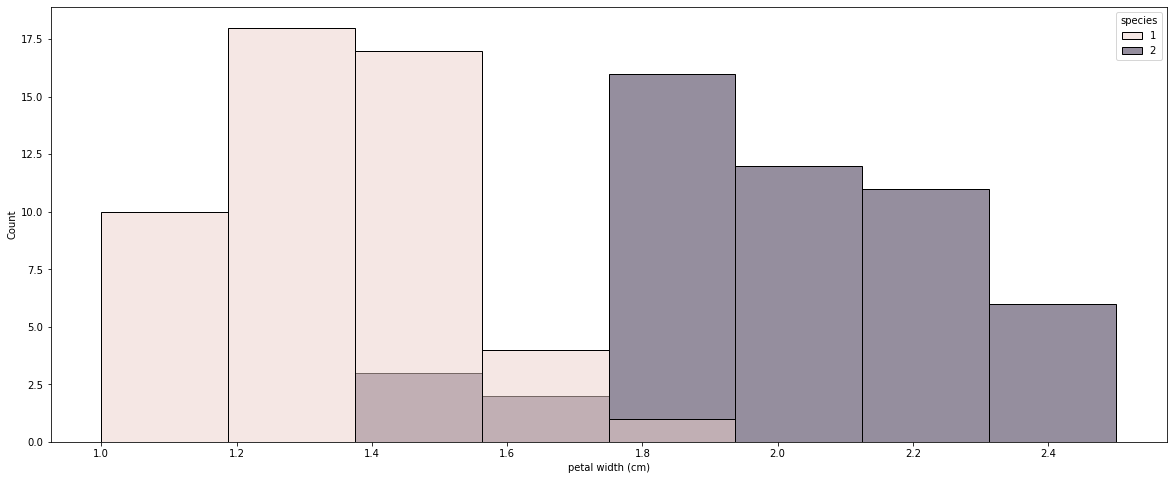

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots( figsize = (20, 8))
sns.histplot(data=data[(data["petal width (cm)"]>0.8)], x="petal width (cm)", hue="species", ax = ax)
plt.show()

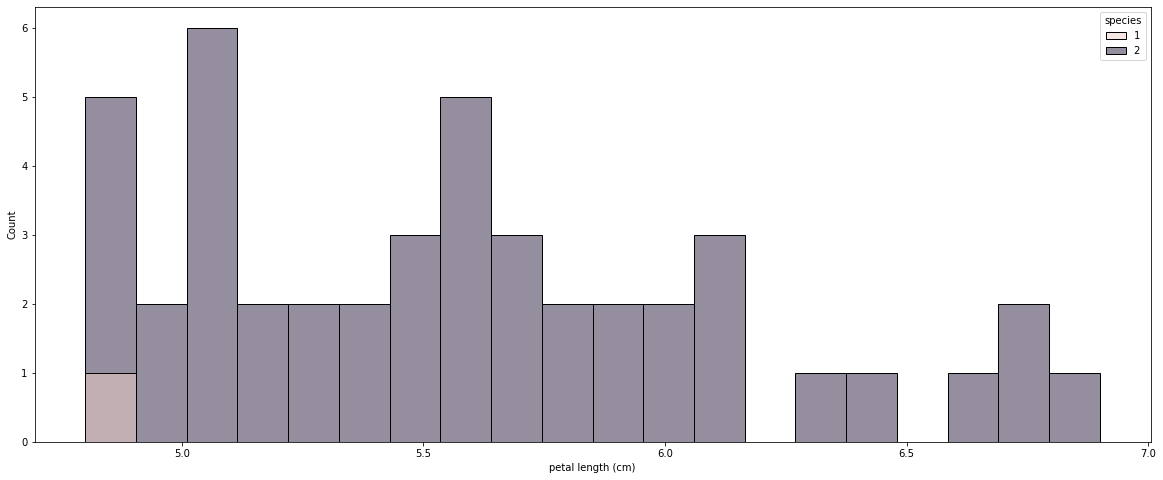

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots( figsize = (20, 8))
sns.histplot(data=data[(data["petal width (cm)"]>1.75)], x="petal length (cm)", hue="species", ax = ax, bins = 20)
plt.show()